In [1]:
from knowknow import *

In [2]:
from load_db import db as dta

loading variable infosci-wos-filtered-grouped/_attributes from disk
loading variable infosci-wos-filtered-grouped/groups from disk
loading variable infosci-wos-filtered-grouped/group_reps from disk


In [21]:
from csv import DictReader

with open('G:/My Drive/2020 ORGANISATION/1. PROJECTS/qualitative analysis of literature/000 papers/2021 1 american sociologist resub/bib_to_key_map.csv') as in_f:
    rs = list(DictReader(in_f))

mp = {r['WOS']: r['BIB'] for r in rs}

In [69]:
def key2name(tname, truncate=None):
    if tname not in mp:
        return f"{tname}"
    
    if mp[tname] not in bibs:
        return f"nf2:{tname}"
    
    bib_ent = bibs[ mp[tname] ]
    
    a = bib_ent['auths_last']
    
    if len(a) > 1:
        a = ", ".join( a[:-1] ) + " & " + a[-1]
    else:
        a = a[0]
        
    y = bib_ent['year']
        
    return f"{a} ({y})"

In [79]:
top_df_02 = stats.top_decade_stratified(dta, 'c', percentile=0.02, yRange=(1960,2005), debug=True)

13 /510 in the top 2.0% in 1960,1970 (13 total accumulated)
15 /585 in the top 2.0% in 1961,1971 (17 total accumulated)
15 /644 in the top 2.0% in 1962,1972 (18 total accumulated)
16 /729 in the top 2.0% in 1963,1973 (20 total accumulated)
20 /821 in the top 2.0% in 1964,1974 (25 total accumulated)
19 /907 in the top 2.0% in 1965,1975 (28 total accumulated)
23 /1027 in the top 2.0% in 1966,1976 (34 total accumulated)
28 /1142 in the top 2.0% in 1967,1977 (41 total accumulated)
32 /1315 in the top 2.0% in 1968,1978 (46 total accumulated)
35 /1559 in the top 2.0% in 1969,1979 (52 total accumulated)
37 /1816 in the top 2.0% in 1970,1980 (56 total accumulated)
42 /2070 in the top 2.0% in 1971,1981 (67 total accumulated)
49 /2277 in the top 2.0% in 1972,1982 (76 total accumulated)
60 /2572 in the top 2.0% in 1973,1983 (88 total accumulated)
67 /2973 in the top 2.0% in 1974,1984 (99 total accumulated)
70 /3353 in the top 2.0% in 1975,1985 (114 total accumulated)
82 /3760 in the top 2.0% in 1

In [80]:
top_sort = top_df_02.sort_values('first_added')
top_names = list(top_sort['name'])

In [81]:
top_sort.shape

(779, 12)

In [82]:
dead_top_02 = []

n_dead = 0
n_tot = 0

for i,r in top_sort.iterrows():
    tt = dta.trend('c', r['name'])
    B,D = tt.births_deaths(death_cutoff=0.1)
        
    n_tot += 1
    
    if len(D):
        # if they didn't die *after* they reached the top 1%, skip
        if D[-1] < r['first_added']:
            continue
        
        n_dead += 1
        dead_top_02.append(r['name'])

(n_dead / n_tot, 1-n_dead / n_tot)

(0.15917843388960207, 0.8408215661103979)

In [74]:
n_dead

124

In [53]:
len(dead_top_02)

124

# table

In [54]:
top_df_01 = stats.top_decade_stratified(dta, 'c', percentile=0.01, yRange=(1930,2005), debug=False)

(398, 12)


In [55]:
my_list = set(dead_top_02).intersection( set(top_df_01['name']) )

In [56]:
[x for x in my_list if 'Davis' in x]

[]

In [57]:
from tabulate import tabulate

In [67]:
def make_table(names, boldnames):
    
    dead_top_01 = names

    yearmin = 1950
    yearmax = 2015
    tickstep = 10

    rows = []
    rows_s = []

    auth_index = 1
    for k in sorted(dead_top_01, key=lambda x:(x, dta.trend('c', x).first)):
        myr = {}
        parts = k.split("|")
        
        myr['key'] = k

        myr['name'] = parts[0]
        myr['title'] = parts[-1]

        trend = dta.trend('c', k)

        if len(parts) <= 2:
            myr['year'] = str(trend.first) + "*"
        else:
            myr['year'] = parts[1]

        decades = [
            trend.avg_between(YY,YY+10-1)
            for YY in range(trend.first, trend.data_end-10)]

        myr['mxc'] = max(decades)
        myr['mxd'] = np.argmax(decades) + trend.first

        last_10 = trend.avg_between(2015,2020)
        myr['last_10'] = last_10

        B,D = trend.births_deaths(death_cutoff=0.1)

        myr['death'] = D[0]
        myr['deaths'] = len(D)

        #if max(decades) < 2*last_10: # skip those that aren't still sorta dead...
        #    continue

        rows.append(myr)
        
    rows_s = [
        [
            f"<b>{key2name(r['key'])}</b>" if r['key'] in boldnames else key2name(r['key']),
            #f"{r['year']}. {r['title']}",
            f"{r['mxc']:0.1f} ({r['mxd']}—{r['mxd']+10})",
            f"{r['death']}",
            #f"{r['deaths']}",
            f"{r['last_10']:0.1f}"
        ]
        for r
        in rows
    ]

    heads = ['Cited work', 'Best Decade', 'Fall', '2015-20']

    display(HTML(tabulate(rows_s, tablefmt='html', headers=heads)))

In [61]:
dta.set_attribute("RELIABLE_DATA_STARTS_HERE", 1920)

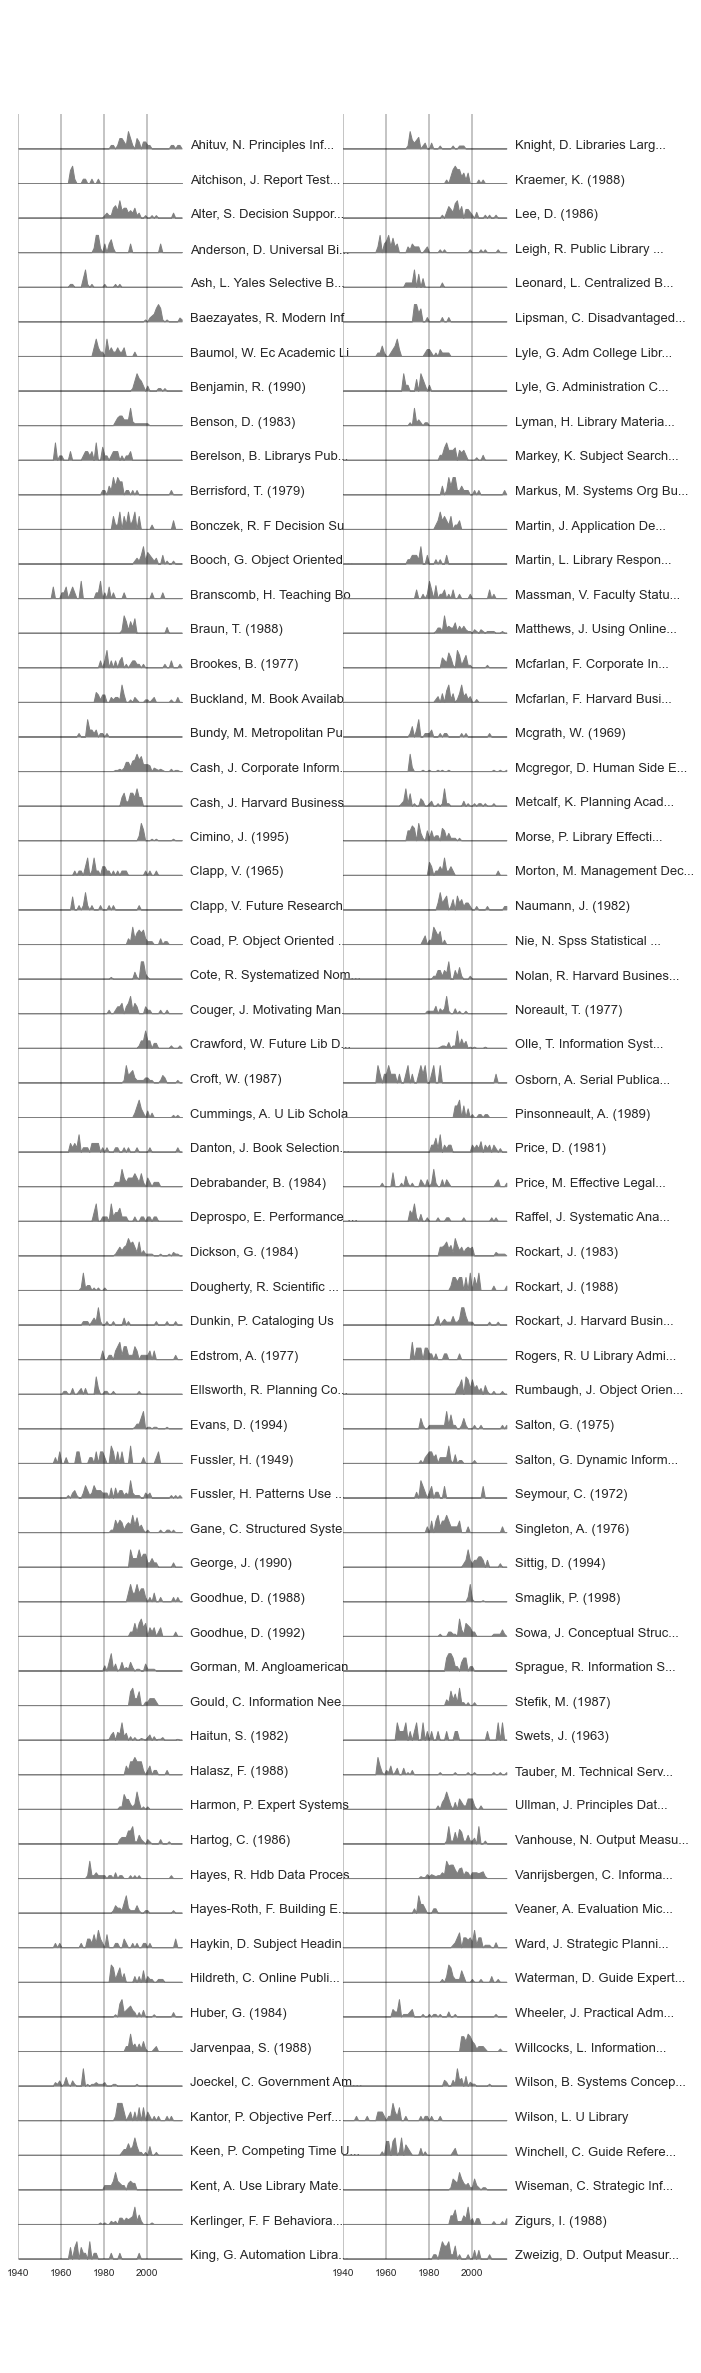

In [62]:
viz.yearly_counts_table_simp(dta, sorted(dead_top_02), yearlim=(1940,2016))
plt.savefig('top 2percent which have died1.png', dpi=150)

In [63]:
bibs={}

In [71]:
top_df_02.shape

(779, 12)

In [72]:
len(dead_top_02)

124

In [70]:
make_table(dead_top_02, boldnames=set(top_df_01['name']))

Cited work,Best Decade,Fall,2015-20
"Ahituv, N.|principles informati",2.3 (1987—1997),2001,0.2
"Aitchison, J.|report test index me",1.0 (1964—1974),1975,0
"Alter, S.|decision support sys",3.7 (1984—1994),2000,0.3
"Anderson, D.|universal bibliograp",1.8 (1975—1985),1993,0
"Ash, L.|yales selective book",1.2 (1964—1974),1975,0
"Baezayates, R.|modern information r",3.4 (1999—2009),2010,0.5
"Baumol, W.|ec academic librarie",1.8 (1975—1985),1990,0
"Benjamin, R.|1990|long range plann,v23,p29",2.5 (1993—2003),2001,0
"Benson, D.|1983|management information systems quarterly,v7,p35",3.7 (1985—1995),1998,0
"Berelson, B.|librarys public repo",1.5 (1970—1980),1993,0.2


# updated connection to BIB

In [ ]:
len(dead_top_02)

In [ ]:
bibs = {}

In [ ]:
def key2name2(tname, truncate=None):
    if tname not in mp:
        return f"nf:{tname}"
    
    tsp = tname.split("|")
    if mp[tname] not in bibs:
        return (tsp[0], "?", tsp[1:])
    
    bib_ent = bibs[ mp[tname] ]
    
    a = bib_ent['auths_last']
    a = ", ".join( a ).replace("{","").replace("}","")
    
    y = bib_ent['year']
    
    tit = bib_ent['title']
    tit = tit.split(":")[0]
        
    return (a,y,tit)

In [ ]:
[key2name2(x) for x in sorted(dead_top_02)[:10]]

In [ ]:
len(dead_top_02)

# something else...

In [ ]:
def fmt_for_search(x):
    s = x.split("|")
    ret = []

    if len(s) == 2:
        ret += ["ti:"+" ".join( '%s*' % x for x in s[-1].split() )]
        ret += ["au:%s" % s[0].split(",")[0]]
    else:
        ret += [" ".join( 
            '"%s"' % x if not re.match( r'[vp][0-9]+', x ) else '"%s"' % x[1:] 
            for x in s[-1].split(",")[1:] )]
        ret += ["'%s'" %  x.split("|")[1]]
        ret += ["'%s'" % s[0].split(",")[0]]
        
    return " ".join(ret)

In [ ]:
from pybtex.database.input import bibtex


def bib_loop( fn ):
    #open a bibtex file
    parser = bibtex.Parser()
    bibdata = parser.parse_file(fn)

    #loop through the individual references
    for bib_id in bibdata.entries:
        b = bibdata.entries[bib_id].fields
        
        try:
            auths = bibdata.entries[bib_id].persons["author"]
            title = b["title"].replace("{","").replace("}","")
            year = int(b['year'])
            auths_last = [ x.last_names[-1] for x in bibdata.entries[bib_id].persons["author"] ]

            yield {
                'auths': auths,
                'title': title,
                'year': year,
                'auths_last': auths_last,
                'type': bibdata.entries[bib_id].type,
                'key': bib_id
            }

        # field may not exist for a reference
        except(KeyError):
            continue

bibs = {}

bfn = "G:/My Drive/2020 ORGANISATION/1. PROJECTS/qualitative analysis of literature/000 papers/2021 1 american sociologist resub/drafts 3/new_deaths.bib"

for r in bib_loop(bfn):
    bibs[ r['key'] ] = r

list(bibs.values())[-1]